In [ ]:
# 1 data availability
# 2 separating independent and dependent
# 3 identifying algorithms
# 4 training
# 5 evaluation

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

In [7]:
aa=pd.read_csv("C:/Users/PC/Downloads/slr.csv")   # step 1
aa.head()

,Exam,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [8]:
# define independent and dependent variable       # step 2

x1=aa['Exam']  #independent
y=aa['GPA']    #dependent

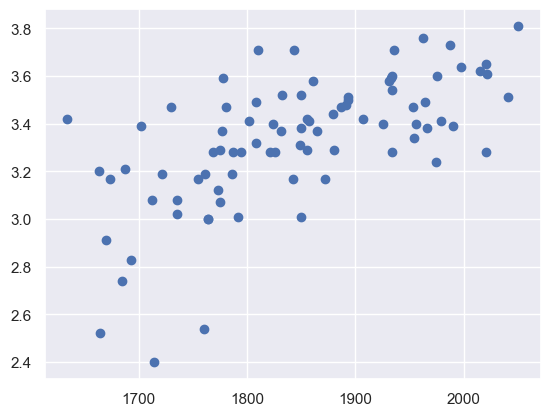

In [9]:
sns.set()      # easy to understand background grid lines                                  # step 4
plt.scatter(x1,y)  # show scatter

In [ ]:
# https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS

In [10]:
x=sm.add_constant(x1)                # create to constant value (1)                 # step 3
x

,const,Exam
0,1.0,1714
1,1.0,1664
2,1.0,1760
3,1.0,1685
4,1.0,1693
...,...,...
79,1.0,1936
80,1.0,1810
81,1.0,1987
82,1.0,1962


In [11]:
model=sm.OLS(y,x)  # creating a model by using indepentant and dependent through OLS Methode      # step 5
result=model.fit() #traing the model                                                             # step 6

In [12]:
result.summary()                                                                                 # step 6 result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           7.20e-11
Time:                        15:35:22   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
Exam           0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
yhat=0.275+0.0017*x1  # y=c+mx
yhat

0     3.1888
1     3.1038
2     3.2670
3     3.1395
4     3.1531
       ...  
79    3.5662
80    3.3520
81    3.6529
82    3.6104
83    3.7600
Name: Exam, Length: 84, dtype: float64

In [14]:
0.275+0.0017*1987  

3.6529

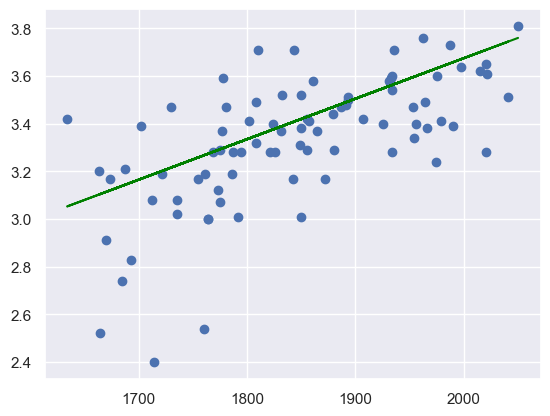

In [15]:
plt.scatter(x1,y)
plt.plot(x1,yhat,color="green")
plt.show()

In [16]:
yhat1=0.275+0.0018*x1  # y=mx+c
yhat1

0     3.3602
1     3.2702
2     3.4430
3     3.3080
4     3.3224
       ...  
79    3.7598
80    3.5330
81    3.8516
82    3.8066
83    3.9650
Name: Exam, Length: 84, dtype: float64

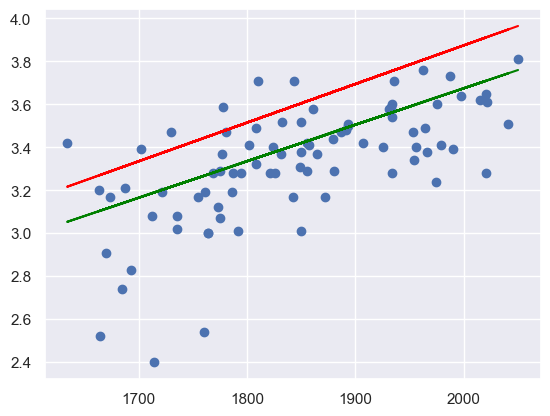

In [17]:
plt.scatter(x1,y)
plt.plot(x1,yhat,color="green")
plt.plot(x1,yhat1,color="red")
plt.show()

In [18]:
result.params[0],result.params[1],result.params

C:\Users\PC\AppData\Local\Temp\ipykernel_17336\1243748612.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result.params[0],result.params[1],result.params


(0.27504029966028876,
 0.0016556880500928112,
 const    0.275040
 Exam     0.001656
 dtype: float64)

C:\Users\PC\AppData\Local\Temp\ipykernel_17336\2780192089.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yhat_org=result.params[0]+result.params[1]*x1


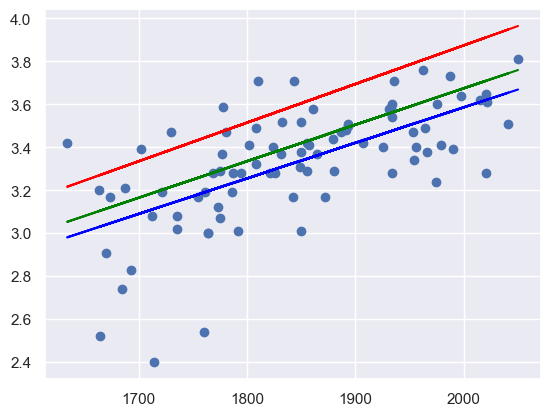

In [19]:
# Best Fit Line                                                     # step 8 Best Fit Line

yhat_org=result.params[0]+result.params[1]*x1
plt.scatter(x1,y)
plt.plot(x1,yhat,color="green")
plt.plot(x1,yhat1,color="red")
plt.plot(x1,yhat_org,color="blue")
plt.show()

In [ ]:
#machine 19-03-2023

In [20]:
df=pd.read_csv("C:/Users/PC/Downloads/Binary predictors.csv")
df.head()

,Marks,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male


In [21]:
df

,Marks,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male
...,...,...,...
163,1722,Yes,Female
164,1750,Yes,Male
165,1555,No,Male
166,1524,No,Male


In [22]:
df["Admitted"]=df["Admitted"].replace({"Yes":1,"No":0})

C:\Users\PC\AppData\Local\Temp\ipykernel_17336\484933467.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Admitted"]=df["Admitted"].replace({"Yes":1,"No":0})


In [23]:
df

,Marks,Admitted,Gender
0,1363,0,Male
1,1792,1,Female
2,1954,1,Female
3,1653,0,Male
4,1593,0,Male
...,...,...,...
163,1722,1,Female
164,1750,1,Male
165,1555,0,Male
166,1524,0,Male
